## Numeryczne Rozwiązywanie Równań Różniczkowych Cząstkowych
### Uniwersytet Jagielloński 2025
Katedra Teorii Optymalizacji i Sterowania UJ

# Metoda różnic skończonych

## Laboratorium II
### Równanie paraboliczne

$$\begin{align*}
    u_{t} &= u_{xx} && x \in (0, 1), \, t > 0 \\
    u(t, 0) &= 0  && t > 0 \\
    u(t, 1) &= 0  && t > 0 \\
    u(0, x) &= \sin(\pi x) && x \in [0, 1]
\end{align*}$$

Rozwiązanie dokładne: $$ u(t, x) = e^{-\pi^2 t} \sin(\pi x) $$

In [ ]:
import numpy as np
import scipy as sc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from typing import Optional

In [ ]:
class SetupParabolic:
    def __init__(self,
                 dx: float,
                 dt: Optional[float] = None,
                 output_freq: int = 100,
                 alpha: float = 0
                 ):
        self.x_range = None
        self.t_range = None
        self.boundary_condition = None

        self.alpha = alpha  # just ignore it
        dt = dt or dx ** 2

        # There are 2 hard problems in computer science:
        # cache invalidation, naming things, and off-by-1 errors.
        self.x_num = round((self.x_range[1] - self.x_range[0]) / dx) + 1
        self.t_num = round((self.t_range[1] - self.t_range[0]) / dt) + 1

        self.X, self.dx = np.linspace(*self.x_range, self.x_num, retstep=True)
        self.T, self.dt = np.linspace(*self.t_range, self.t_num, retstep=True)

        self.output_freq = output_freq

    @staticmethod
    def initial(x):
        pass

    @staticmethod
    def exact(t, x):
        pass

In [ ]:
def create_matrices(setup):
    u = np.empty(setup.x_num)
    # TODO initial condition

    # TODO boundary condition

    # TODO Matrix A
    A = None

    return A, u

def create_RH(u, setup):
    d = np.zeros(setup.x_num - 2)
    # TODO right hand side
    return d


def scheme_parabolic(setup):
    u_matrix = np.zeros((setup.x_num, setup.t_num // setup.output_freq))
    A, u = create_matrices(setup)
    for t in range(1, setup.t_num):  # suboptimal, but simple
        d = create_RH(???)
        u[1:-1] = ???  # solving, but why these ones again?
        if (t-1) % setup.output_freq == 0:
            u_matrix[:, (t-1) // setup.output_freq] = u[:]
    
    return u

In [ ]:
%%time
# numerical solution
setup_parabolic = SetupParabolic(0.01)
numerical_parabolic = scheme_parabolic(setup_parabolic)

CPU times: user 18.9 s, sys: 1.37 s, total: 20.3 s
Wall time: 20.3 s


In [ ]:
def plot_surface(values, setup):
    pass
    # TODO

In [ ]:
# exact solution
X = np.linspace(*setup_parabolic.x_range, setup_parabolic.x_num)
T = np.linspace(*setup_parabolic.t_range, setup_parabolic.t_num // setup_parabolic.output_freq)
X, T = np.meshgrid(X, T)
exact_parabolic = setup_parabolic.exact(T, X).T

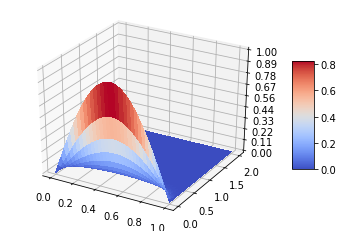

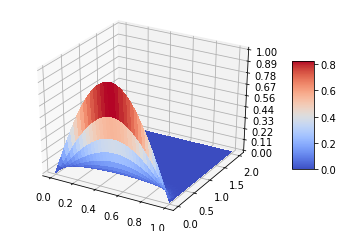

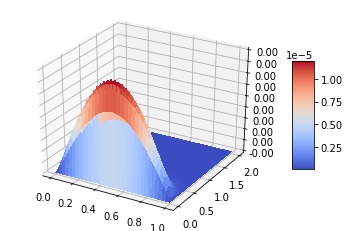

In [ ]:
plot_surface(numerical_parabolic, setup_parabolic)
plot_surface(exact_parabolic, setup_parabolic)
plot_surface(numerical_parabolic - exact_parabolic, setup_parabolic)

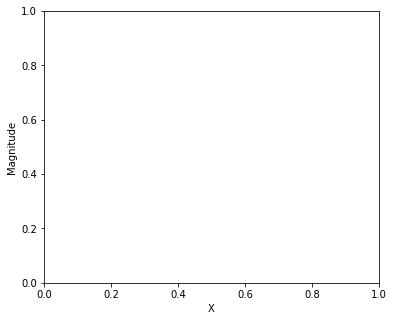

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(6,5))
ax1 = plt.subplot(1,1,1)   
# ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(setup_parabolic.x_range)            
ax1.set_ylim((0, 1))
ax1.set_xlabel('X')
ax1.set_ylabel('Magnitude')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'orange', lw=2)     # ax.plot returns a list of 2D line objects

In [ ]:
# animation function. This is called sequentially
def drawframe(n):
    x = setup_parabolic.X
    y = numerical_parabolic[:, n]
    line1.set_data(x, y)
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,)

In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=numerical_parabolic.shape[1], interval=20, blit=True)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())